# Credit Card Fraud Detection::

Download dataset from this link:

https://www.kaggle.com/mlg-ulb/creditcardfraud

# Description about dataset::

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 


### Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# WORKFLOW :

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Standardized the Input Variables. 

4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

6.Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)

7.Train the Model with Epochs (100).

8.If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .

9.Prediction should be > 92%
10.Evaluation Step
11Prediction


# Task::

## Identify fraudulent credit card transactions.

**1. Load Data**
Loading and immediately shuffeling Data frame.

In [ ]:
# Prediction Model developed by:
# Khurram Nazir
#  
#
import pandas as pd
import numpy as np
import seaborn as sns
#

import io
from google.colab import files

uploaded_file = files.upload()
#df = pd.read_csv("C:/Users/khurr/Documents/GitHub/AI-Engineering/PIAIC/Quarter-2/DeepLearning/CreditCardFraudDetection/creditcard.csv",sep=',')
df = pd.DataFrame(pd.read_csv(io.BytesIO(uploaded_file['creditcard.csv']),sep=','))

Saving creditcard.csv to creditcard.csv


**Data Preprocessing**

In [ ]:
df = df.sample(frac=1) #Shuffeling DF. 
df1=df #Aviding to reload data again & again from file.
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
64185,51067.0,0.536717,0.090463,1.134899,1.724024,-0.635885,0.793883,-0.421369,0.428730,1.024854,0.020049,0.664470,1.551671,-0.445985,-0.680214,-2.402238,-1.206342,0.709892,-0.741002,0.849804,-0.236664,-0.225364,-0.208870,0.412062,0.199573,-1.018516,-0.675466,-0.068988,-0.122334,20.78,0
36436,38535.0,-1.185253,0.397230,0.636781,-2.139428,-0.454006,-0.224041,0.502780,0.603537,0.854961,-1.773599,0.458254,0.099457,-2.523987,0.965988,-0.131108,-0.365195,-0.119036,0.229618,0.097433,-0.489503,-0.015689,-0.144561,0.060228,-0.377304,0.016670,-1.005483,-0.066212,0.009247,88.97,0
274201,165899.0,1.866748,0.011582,-1.781247,1.215596,0.730180,-0.378462,0.619591,-0.234691,-0.185538,0.368097,0.851455,1.352516,0.376523,0.593604,-1.244699,-0.546856,-0.430146,-0.209207,0.042203,-0.081348,0.145675,0.456557,-0.041958,0.731332,0.442545,-0.552150,-0.031393,-0.051858,74.86,0
94663,64978.0,-0.397299,0.811866,1.284498,0.879811,0.076744,-0.665860,1.250132,-0.362702,-0.419350,0.123263,-0.428271,-0.231698,0.004358,0.113895,1.057510,-0.400089,-0.300428,0.111855,0.385011,0.403862,0.111049,0.505111,0.005072,0.384240,-0.183635,-0.348163,0.222827,0.009893,89.55,0
224225,143701.0,-1.087965,0.309144,-1.424678,-0.002609,0.867860,-0.949465,-0.252551,-0.497153,0.209420,0.138327,0.527635,0.389882,-1.348132,1.208748,-0.077758,-0.436654,-0.127048,0.575521,0.878454,-0.633939,0.932414,0.323533,-0.441924,0.782923,-0.367487,-0.570916,0.209012,-0.314917,5.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270830,164278.0,-0.666107,1.955806,-0.970569,0.994797,1.430764,-0.223036,0.992730,-1.818298,-0.668780,-0.494698,-0.680511,-0.036268,0.238055,-1.103027,-0.197782,-0.667978,1.373538,0.318554,0.558223,-0.217497,1.528994,-0.117638,-0.144217,0.486151,0.109667,-0.388068,0.569650,0.281173,35.19,0
281438,170182.0,-2.975257,3.082269,-3.426893,-2.956799,3.093995,2.596861,1.217079,0.518896,2.189580,3.950829,0.268061,-0.118363,-0.505003,-0.295380,0.486345,-1.138985,-0.741088,-0.752800,-0.648189,1.777793,-0.255157,0.581680,-0.111795,0.700873,0.343542,0.084868,1.153941,0.344009,7.70,0
83897,60075.0,1.446924,-0.427289,-0.643136,-0.855597,-0.195053,-0.831853,-0.000067,-0.357523,-1.091096,0.670830,-1.095000,-0.933351,0.299323,0.064001,0.498135,1.014239,0.055914,-1.277686,0.989231,0.170866,0.148607,0.286473,-0.315872,-0.528606,0.909388,-0.029130,-0.037010,-0.001473,50.00,0
16768,28130.0,-5.656755,-0.689211,-1.200654,-0.226849,-1.690167,-0.368161,-1.867186,2.119909,1.110210,-0.784590,-1.855929,1.045463,0.164980,0.588652,-0.478331,0.847000,0.686102,-0.842290,-0.484885,-1.159874,-0.424794,-0.806220,-1.706960,-0.228396,-0.171114,0.835452,0.260218,-0.835033,154.00,0


In [141]:
def df_lookslike(v_df):
    #---------------------------------------How dataframe looks like?
    v_df.info()
    print(v_df.head(5))
    total_cells=np.product(v_df.shape)
    num_col = [i for i in v_df.columns if (v_df[i].dtype=='int64' or v_df[i].dtype=='float64')]
    print(v_df[num_col].describe().loc[['min','max', 'mean','50%'],:]) #How big is Messy data?
    missing_Values=v_df.isnull().sum()
    print(missing_Values)
    total_missing=missing_Values.sum()

    #Percent of Missing data
    print("Percent of data is missing:",((total_missing/total_cells) * 100))
#
df=df1
    

**2. Check Missing Values**
( If Exist ; Fill each record with mean of its feature )

I found there is NO missing/NULL data.

In [142]:
df_lookslike(df)# How DF looks like?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284807 entries, 64185 to 194503
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21   

**3. Split data**
50% Training, 30% Test, and 20% Validation.

In [143]:
#The ideal situation is 1st SPLIT DATA then do the Normalization.
# If we do Normalization before the Data splitting then TEST/VALIDATION Data will also be exposed w.r.t to MEAN & STD.
#Which is absolutly NOT required/incorrect approach.

#For picture data Normalization:	We divide each value by its Higher pixel value (for colored pic 255)
#For Discrete/number data Normalization:	We extract mean and std

#We can use following libraries to Normalize particular data.
#from sklearn.preprocessing import StandardScaler
#However, in sklearn function shuffel parameter by defaul is True. But Remember Timeseries data shouldn't be shuffel :)

from sklearn.model_selection import train_test_split

Y=(df.loc[:,df.columns=='Class']) #Lets take Dependent Variable/Target in a serpate df i.e X.
X=(df.loc[:,df.columns!='Class']) #Lets take Independent Variables in a serpate df i.e Y.

print("How Y looks like:\n", Y.head(5))
print("How Features/X looks like:\n", X.head(5))

x_train_50,X_remaining,y_train_50,Y_remaining=train_test_split(X,Y,test_size=0.5,random_state=0)
x_test_30,x_valid_20,y_test_30,y_valid_20=train_test_split(X_remaining,Y_remaining,test_size=0.7,random_state=0)

print("X/Training Data shape [50%]:\t", x_train_50.shape)
print("X/Test Data [30%]:\t", x_test_30.shape)
print("X/Validate Data [20%]:\t", x_valid_20.shape)


How Y looks like:
         Class
64185       0
36436       0
274201      0
94663       0
224225      0
How Features/X looks like:
             Time        V1        V2  ...       V27       V28  Amount
64185    51067.0  0.536717  0.090463  ... -0.068988 -0.122334   20.78
36436    38535.0 -1.185253  0.397230  ... -0.066212  0.009247   88.97
274201  165899.0  1.866748  0.011582  ... -0.031393 -0.051858   74.86
94663    64978.0 -0.397299  0.811866  ...  0.222827  0.009893   89.55
224225  143701.0 -1.087965  0.309144  ...  0.209012 -0.314917    5.00

[5 rows x 30 columns]
X/Training Data shape [50%]:	 (142403, 30)
X/Test Data [30%]:	 (42721, 30)
X/Validate Data [20%]:	 (99683, 30)


**4. Data Normalization**



In [144]:
#The ideal situation is 1st SPLIT DATA then do the Normalization.
# If we do Normalization before the Data splitting then TEST/VALIDATION Data will also be exposed w.r.t to MEAN & STD.
#Which is absolutly NOT required/incorrect approach.

#For picture data Normalization:	We divide each value by its Higher pixel value (for colored pic 255) 
#For Discrete/number data Normalization:	We extract mean and std

#We can use following libraries to Normalize particular data.
#from sklearn.preprocessing import StandardScaler
#Analyzing how DF looks like in pre-normalization phase.

print("Pre Normalization X Training data:\n",x_train_50.head(5))
print("Pre Normalization X Test data:\n",x_test_30.head(5))
print("Pre Normalization X Valid data:\n",x_valid_20.head(5))

#I'v checked there are two columns who's data is too high/low. Thus, Normalizing following TWO columns in individaul DF (Training, Test, Validation).
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_50[['Time', 'Amount']] = sc.fit_transform(x_train_50[['Time', 'Amount']])
x_test_30[['Time', 'Amount']] = sc.fit_transform(x_test_30[['Time', 'Amount']])
x_valid_20[['Time', 'Amount']] = sc.fit_transform(x_valid_20[['Time', 'Amount']])

print("Post Normalization X Training data:\n",x_train_50.head(5))
print("Post Normalization X Test data:\n",x_test_30.head(5))
print("Post Normalization X Valid data:\n",x_valid_20.head(5))


Pre Normalization X Training data:
             Time        V1        V2  ...       V27       V28  Amount
70893    54063.0  1.236275  0.232268  ... -0.032976  0.015403    1.78
206104  136069.0  1.092706 -0.841944  ... -0.068124  0.027253  376.93
244971  152554.0  1.322497 -1.574789  ... -0.100619  0.005266  356.00
284099  172150.0  2.080279  0.216415  ... -0.057459 -0.029361    1.29
261915  160238.0  2.152922  0.075237  ... -0.062596 -0.079286   18.96

[5 rows x 30 columns]
Pre Normalization X Test data:
             Time        V1        V2  ...       V27       V28  Amount
271221  164469.0 -0.550971  0.044051  ...  0.211092  0.008349    2.00
60665    49434.0  0.863584 -1.435374  ...  0.038830  0.065134  223.36
262818  160658.0  2.194681 -1.376135  ...  0.033170 -0.078661   15.00
24770    33375.0 -0.829061  0.344202  ... -0.086650  0.085158    1.02
86194    61127.0 -0.857244 -0.065917  ... -0.181520 -0.094433    1.00

[5 rows x 30 columns]
Pre Normalization X Valid data:
             T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

**5.Model :**
Input Layer (No. of features ), 4 hidden layers including 10,8,6 unit & Output

In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

network = Sequential()

network.add(layers.Dense(10, activation='relu', kernel_regularizer =regularizers.l2(0.02),   input_shape=(x_train_50.shape[1],)))
network.add(layers.Dense(8, activation='relu', kernel_regularizer =regularizers.l2(0.02)))
#I'm passing 01 Neurons and Sigmoid/probability as Activation function as as output is binary.
#However, for Regression also use 01-Neurons but do not specify Activation function.
network.add(layers.Dense(1, activation='sigmoid', kernel_regularizer =regularizers.l2(0.002)))


**6.Compilation Step**
(Note : Its a Binary problem , select loss , metrics according to it)

In [146]:
from tensorflow import keras
#Preparing parameters for Optimizer.
opt = keras.optimizers.Adam(learning_rate=0.01) #I want lowest learning rate as higher accuracy required.
network.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')

**7.Train the Model**

In [147]:
model_history = network.fit(x_train_50,y_train_50, batch_size=1024, epochs=200, validation_data=(x_valid_20, y_valid_20))

Epoch 1/200
140/140 [==============================] - 1s 5ms/step - loss: 0.3108 - accuracy: 0.9903 - val_loss: 0.0301 - val_accuracy: 0.9982
Epoch 2/200
140/140 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9984 - val_loss: 0.0242 - val_accuracy: 0.9982
Epoch 3/200
140/140 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9983 - val_loss: 0.0217 - val_accuracy: 0.9982
Epoch 4/200
140/140 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9985 - val_loss: 0.0201 - val_accuracy: 0.9982
Epoch 5/200
140/140 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9984 - val_loss: 0.0191 - val_accuracy: 0.9982
Epoch 6/200
140/140 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9985 - val_loss: 0.0184 - val_accuracy: 0.9982
Epoch 7/200
140/140 [==============================] - 0s 3ms/step - loss: 0.0175 - accuracy: 0.9984 - val_loss: 0.0177 - val_accuracy: 0.9982

In [148]:
Training_Loss = model_history.history['loss']
Validated_Loss = model_history.history['val_loss']
Each_Epochs=range(1,201)
import matplotlib.pyplot as plt

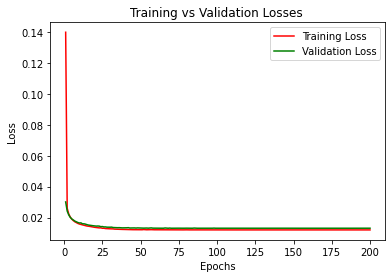

In [149]:
plt.plot(Each_Epochs, Training_Loss, 'r', label='Training Loss')
plt.plot(Each_Epochs, Validated_Loss, 'g', label='Validation Loss')
plt.title('Training vs Validation Losses ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Looks very good as i suggested Optimizer to take lower Learning rate.

**8.Prediction** 

In [150]:
network.predict(x_test_30)

array([[0.00153476],
       [0.00153476],
       [0.00153476],
       ...,
       [0.00153476],
       [0.00153476],
       [0.00153476]], dtype=float32)

In [151]:
network.evaluate(x_test_30,y_test_30)

1336/1336 [==============================] - 1s 1ms/step - loss: 0.0143 - accuracy: 0.9980


[0.014273595996201038, 0.9980337619781494]